In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
%matplotlib inline

In [3]:
#!type resale_Lincoln_MKS.csv

In [4]:
# load dataset
df_4Runner = pd.read_csv('resale_Toyota_4Runner.csv')
df_4Runner.head()

,brand,config,drivetrain,exterior_color,interior_color,mileage,model,price,transmission,year
0,Toyota,Trail,4x4/4-wheel drive,Silver,Black,24587,4Runner,NaN,Automatic,2016
1,Toyota,SR5,4x4/4-wheel drive,Blue,Other,17744,4Runner,31398.0,Automatic,2018
2,Toyota,TRD Pro,4x4/4-wheel drive,Gray,Black,25510,4Runner,40078.0,Automatic,2016
3,Toyota,SR5 Premium,4x4/4-wheel drive,Black,Black,64445,4Runner,27350.0,Automatic,2014
4,Toyota,Sport,4x4/4-wheel drive,Gray,Black,15489,4Runner,35266.0,Automatic,2017


In [5]:
## clean the dataset
# drop rows that have NaN
df_4Runner = df_4Runner.dropna(axis=0, how='any')

config
SR5             1680
Limited         1030
SR5 Premium      575
TRD Off Road     282
Sport            150
TRD Pro          133
dtype: int64


Text(0.5, 1.0, 'Toyota 4Runner-Configuration Plot')

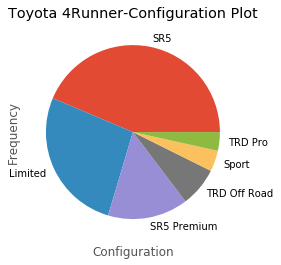

In [6]:
## Explore the dataset: Take care of the config: only care about Base and EcoBoost
df_4Runner = df_4Runner[df_4Runner['config'].isin(['SR5', 'Limited', 'SR5 Premium', 'TRD Off Road', 'Sport', 'TRD Pro']) ]
group_config = df_4Runner.groupby('config')
print(group_config.size().sort_values(ascending = False))
df_4Runner['config'].value_counts().plot(kind='pie')
plt.xlabel('Configuration')
plt.ylabel('Frequency')
plt.title('Toyota 4Runner-Configuration Plot')

exterior_color
White     1003
Black      983
Gray       648
Silver     618
Red        273
Blue       249
dtype: int64


Text(0.5, 1.0, 'Toyota 4Runner-Exterior Color')

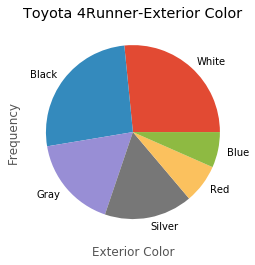

In [7]:
## Explore the dataset: Take care of the exterior_color: ['Black', 'White', 'Brown', 'Silver', 'Red', 'Gray', 'Beige', 'Other', 'Blue']
df_4Runner = df_4Runner[df_4Runner['exterior_color'].isin(['White', 'Black', 'Gray', 'Silver', 'Red', 'Blue'])]
group_ext_color = df_4Runner.groupby('exterior_color')
print(group_ext_color.size().sort_values(ascending = False))
df_4Runner['exterior_color'].value_counts().plot(kind='pie')
plt.xlabel('Exterior Color')
plt.ylabel('Frequency')
plt.title('Toyota 4Runner-Exterior Color')

interior_color
Black    2197
Beige     593
Gray      482
Other     399
dtype: int64


Text(0.5, 1.0, 'Toyota 4Runner-Interior Color')

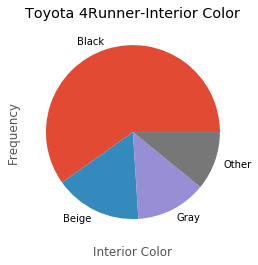

In [8]:
## Explore the dataset: Take care of the interior_color: []
df_4Runner = df_4Runner[df_4Runner['interior_color'].isin(['Black', 'Gray', 'Other', 'Beige'])]
group_int_color = df_4Runner.groupby('interior_color')
print(group_int_color.size().sort_values(ascending = False))
df_4Runner['interior_color'].value_counts().plot(kind='pie')
plt.xlabel('Interior Color')
plt.ylabel('Frequency')
plt.title('Toyota 4Runner-Interior Color')

drivetrain
4x4/4-wheel drive    2612
RWD                  1019
dtype: int64


Text(0.5, 1.0, 'Toyota 4Runner-Drivetrain')

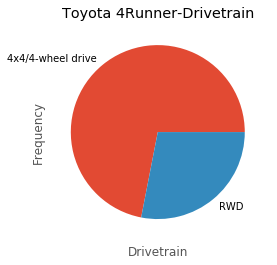

In [9]:
## Explore the dataset: Take care of the drivetrain:
df_4Runner = df_4Runner[df_4Runner['drivetrain'].isin(['4x4/4-wheel drive', 'RWD'])]
group_dt = df_4Runner.groupby('drivetrain')
print(group_dt.size().sort_values(ascending = False))
df_4Runner['drivetrain'].value_counts().plot(kind='pie')
plt.xlabel('Drivetrain')
plt.ylabel('Frequency')
plt.title('Toyota 4Runner-Drivetrain')

year
2016    1006
2018     899
2019     524
2017     440
2015     270
2014     140
2013      95
2012      57
2011      52
2010      34
2007      29
2006      23
2005      18
2008      17
2004      13
2003       5
2000       3
2009       3
2002       2
1999       1
dtype: int64


Text(0.5, 1.0, 'Toyota 4Runner-Year')

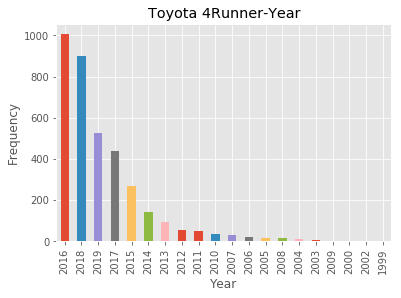

In [10]:
## Explore the dataset: Take care of the year:
group_yr = df_4Runner.groupby('year')
print(group_yr.size().sort_values(ascending = False))
df_4Runner['year'].value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Toyota 4Runner-Year')

Text(0.5, 1.0, 'Toyota 4Runner-Price vs Mileage')

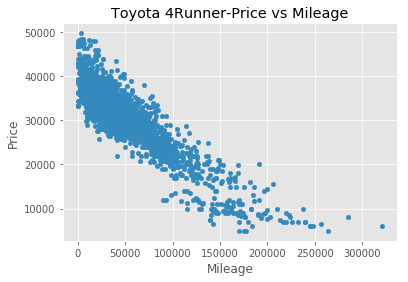

In [11]:
# scatter(x='Mileage', y='Price')
df_4Runner.plot(kind='scatter',x='mileage', y='price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Toyota 4Runner-Price vs Mileage')

Text(0.5, 1.0, 'Toyota 4Runner-Price vs Year')

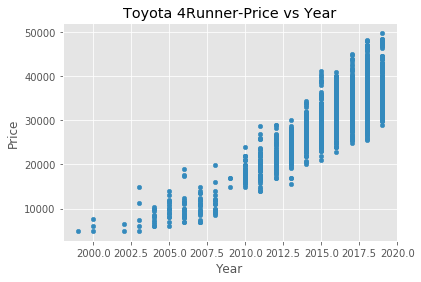

In [12]:
# scatter(x='Year', y='Price')
df_4Runner.plot(kind='scatter',x='year', y='price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Toyota 4Runner-Price vs Year')

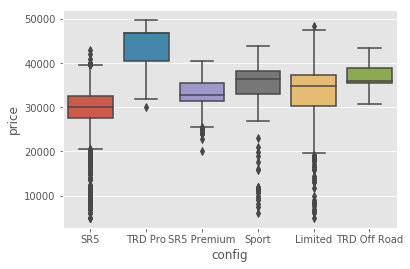

In [13]:
import seaborn as sns
# boxplot of price by config
sns.boxplot(x='config', y='price', data=df_4Runner)

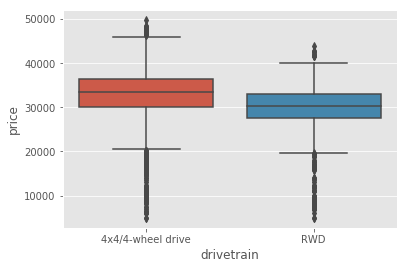

In [14]:
# boxplot of price by drivetrain
sns.boxplot(x='drivetrain', y='price', data=df_4Runner)

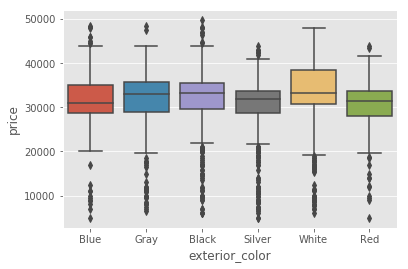

In [15]:
# boxplot of price by color
sns.boxplot(x='exterior_color', y='price', data=df_4Runner)

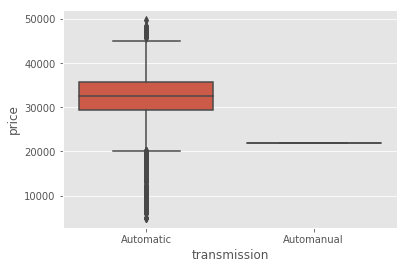

In [16]:
# boxplot of price by transmission
sns.boxplot(x='transmission', y='price', data=df_4Runner)

In [17]:
## Models 
# Linear Regression on Price vs Year
from sklearn.linear_model import LinearRegression
X = df_4Runner['year'].values.reshape(-1, 1)
y = df_4Runner['price'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)
price_2019 = reg.predict(np.array([2019]).reshape(-1, 1))
price_2016 = reg.predict(np.array([2016]).reshape(-1, 1))
price_2014 = reg.predict(np.array([2014]).reshape(-1, 1))
print(price_2016/price_2019)
print(price_2014/price_2019)

[[1985.08285283]]
[-3970513.26954665]
[[0.84063671]]
[[0.73439451]]


In [20]:
# Linear Regression on Price vs Mileage
from sklearn.linear_model import LinearRegression
X = df_4Runner['mileage'].values.reshape(-1, 1)
y = df_4Runner['price'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)
price_0 = reg.predict(np.array([0]).reshape(-1, 1))
price_45k = reg.predict(np.array([45000]).reshape(-1, 1))
price_75k = reg.predict(np.array([75000]).reshape(-1, 1))
print(price_45k/price_0)
print(price_75k/price_0)

[[-0.15454751]]
[38376.37243871]
[[0.81877813]]
[[0.69796355]]


In [19]:
# Multiple linear regression